In [1]:
import pandas as pd, numpy as np, os
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
output_dir ='/ihme/costeffectiveness/results/vivarium_ciff_sam/v5.1.2_lbwsg_with_observer/ciff_sam/2021_12_29_17_30_01/count_data/'

In [3]:
figname = 'model_5.1.2'

In [4]:
os.listdir(output_dir)

['wasting_transition_count.hdf',
 'wasting_transition_count.csv',
 'wasting_state_person_time.hdf',
 'deaths.csv',
 'wasting_state_person_time.csv',
 'deaths.hdf',
 'disease_transition_count.csv',
 'population.csv',
 'stunting_state_person_time.hdf',
 'ylds.csv',
 'ylls.csv',
 'disease_state_person_time.csv',
 'population.hdf',
 'ylls.hdf',
 'ylds.hdf',
 'disease_state_person_time.hdf',
 'disease_transition_count.hdf',
 'stunting_state_person_time.csv']

In [5]:
wasting_pt = pd.read_csv(output_dir +'wasting_state_person_time.csv')
wasting_pt

,Unnamed: 0,sex,year,cause,measure,input_draw,scenario,value,x_factor,sq_lns,mam_treatment,sam_treatment,age
0,0,female,2022,mild_child_wasting,state_person_time,29,baseline,0.000000,cat2,covered,covered,covered,early_neonatal
1,1,female,2022,mild_child_wasting,state_person_time,29,baseline,0.000000,cat1,covered,covered,covered,early_neonatal
2,2,female,2022,mild_child_wasting,state_person_time,29,baseline,0.000000,cat2,covered,uncovered,covered,early_neonatal
3,3,female,2022,mild_child_wasting,state_person_time,29,baseline,0.000000,cat1,covered,uncovered,covered,early_neonatal
4,4,female,2022,mild_child_wasting,state_person_time,29,baseline,0.000000,cat2,covered,covered,uncovered,early_neonatal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138235,138235,male,2026,susceptible_to_child_wasting,state_person_time,946,wasting_treatment,869.240246,cat1,uncovered,uncovered,covered,2_to_4
138236,138236,male,2026,susceptible_to_child_wasting,state_person_time,946,wasting_treatment,921.193703,cat2,uncovered,covered,uncovered,2_to_4
138237,138237,male,2026,susceptible_to_child_wasting,state_person_time,946,wasting_treatment,867.397673,cat1,uncovered,covered,uncovered,2_to_4
138238,138238,male,2026,susceptible_to_child_wasting,state_person_time,946,wasting_treatment,395.530459,cat2,uncovered,uncovered,uncovered,2_to_4


In [6]:
cols = ['input_draw','scenario','sex','age']

wasting_pt = pd.read_csv(output_dir +'wasting_state_person_time.csv').groupby(cols).sum()[['value']]
stunting_pt = pd.read_csv(output_dir +'stunting_state_person_time.csv').groupby(cols).sum()[['value']]
disease_pt = pd.read_csv(output_dir +'disease_state_person_time.csv')
disease_pt['cause'] = disease_pt.cause.str.replace('susceptible_to_','')
disease_pt = disease_pt.groupby(cols+['cause']).sum()[['value']].reset_index()
disease_pt['value'] = disease_pt['value'].round(0)
stunting_pt['value'] = stunting_pt['value'].round(0)
wasting_pt['value'] = wasting_pt['value'].round(0)

assert np.all(disease_pt.loc[disease_pt.cause=='diarrheal_diseases'].drop(columns='cause').set_index(cols) 
        == disease_pt.loc[disease_pt.cause=='lower_respiratory_infections'].drop(columns='cause').set_index(cols))

assert np.all(disease_pt.loc[disease_pt.cause=='diarrheal_diseases'].drop(columns='cause').set_index(cols) 
        == disease_pt.loc[disease_pt.cause=='measles'].drop(columns='cause').set_index(cols))

assert np.all(disease_pt.loc[disease_pt.cause=='diarrheal_diseases'].drop(columns='cause').set_index(cols) 
        == wasting_pt)

assert np.all(disease_pt.loc[disease_pt.cause=='diarrheal_diseases'].drop(columns='cause').set_index(cols) 
        == stunting_pt)

# Wasting and stunting exposures

In [7]:
state_pt = pd.read_csv(output_dir +'wasting_state_person_time.csv')
state_pt.head()

,Unnamed: 0,sex,year,cause,measure,input_draw,scenario,value,x_factor,sq_lns,mam_treatment,sam_treatment,age
0,0,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat2,covered,covered,covered,early_neonatal
1,1,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat1,covered,covered,covered,early_neonatal
2,2,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat2,covered,uncovered,covered,early_neonatal
3,3,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat1,covered,uncovered,covered,early_neonatal
4,4,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat2,covered,covered,uncovered,early_neonatal


In [8]:
groupby_cols = ['input_draw','sex','age','cause']

def calculate_child_growth_exposure_prevalence(risk):
    state_pt = pd.read_csv(output_dir +f'{risk}_state_person_time.csv')
    state_pt = state_pt.loc[state_pt.scenario=='baseline']
    state_pt = state_pt.groupby(groupby_cols).sum()[['value']].reset_index()
    if risk=='wasting':
        state_pt_exposed = state_pt.loc[state_pt.cause.str.contains('acute_malnutrition')]
        state_pt_exposed['cause'] = 'wasted'
    else:
        state_pt_exposed = state_pt.loc[state_pt.cause.isin(['cat1','cat2'])]
        state_pt_exposed['cause'] = 'stunted'
    state_pt_with_exposed = (pd.concat([state_pt, 
                          state_pt_exposed.groupby(groupby_cols).sum().reset_index()],
                         ignore_index=True)
                .set_index(groupby_cols))
    prev = state_pt_with_exposed / state_pt.groupby([c for c in groupby_cols if c != 'cause']).sum()
    prev = prev.groupby([c for c in groupby_cols if c != 'input_draw']).describe(percentiles=[0.025,0.975]).sort_index()
    return prev

In [9]:
wasting_prev = calculate_child_growth_exposure_prevalence('wasting')
wasting_prev.head()

<ipython-input-8-4f0de826d651>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_pt_exposed['cause'] = 'wasted'


value                      \
                                               count      mean       std   
sex    age        cause                                                    
female 1-5_months mild_child_wasting            12.0  0.201152  0.003685   
                  moderate_acute_malnutrition   12.0  0.080765  0.001547   
                  severe_acute_malnutrition     12.0  0.022597  0.001808   
                  susceptible_to_child_wasting  12.0  0.695486  0.004506   
                  wasted                        12.0  0.103362  0.003079   

                                                                              \
                                                     min      2.5%       50%   
sex    age        cause                                                        
female 1-5_months mild_child_wasting            0.192826  0.194405  0.201168   
                  moderate_acute_malnutrition   0.078387  0.078560  0.080684   
                  severe_acute_malnutrition     0.018580  0.018982  0.023061   
                  susceptible_to_child_wasting  0.691947  0.692107  0.693892   
                  wasted                        0.097595  0.097824  0.104003   

                                                                    
                                                   97.5%       max  
sex    age        cause                                             
female 1-5_months mild_child_wasting            0.206497  0.206583  
                  moderate_acute_malnutrition   0.083325  0.083581  
                  severe_acute_malnutrition     0.024653  0.024819  
                  susceptible_to_child_wasting  0.705786  0.708746  
                  wasted                        0.107027  0.107072

In [10]:
stunting_prev = calculate_child_growth_exposure_prevalence('stunting')
stunting_prev.head()

<ipython-input-8-4f0de826d651>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_pt_exposed['cause'] = 'stunted'


value                                          \
                          count      mean       std       min      2.5%   
sex    age        cause                                                   
female 1-5_months cat1     12.0  0.040490  0.004198  0.032453  0.033529   
                  cat2     12.0  0.108565  0.003139  0.102811  0.103274   
                  cat3     12.0  0.203921  0.008914  0.186883  0.187770   
                  cat4     12.0  0.647024  0.009057  0.635307  0.635471   
                  stunted  12.0  0.149055  0.006043  0.138648  0.139796   

                                                         
                                50%     97.5%       max  
sex    age        cause                                  
female 1-5_months cat1     0.040248  0.047453  0.047720  
                  cat2     0.108843  0.112898  0.113597  
                  cat3     0.203907  0.217113  0.218474  
                  cat4     0.645003  0.663532  0.665927  
                  stunted  0.149402  0.159828  0.161318

In [11]:
# artifact
from vivarium import Artifact
art = Artifact('/ihme/costeffectiveness/artifacts/vivarium_ciff_sam/ethiopia.hdf',
               filter_terms=['year_start == 2020', f'age_end <= 5'])

In [12]:
def load_child_growth_artifact_prev(risk):
    data = art.load(f'risk_factor.child_{risk}.exposure').reset_index()
    data_exposed = data.loc[data.parameter.isin(['cat1','cat2'])]
    data_exposed['parameter'] = 'exposed'
    data_exposed = data_exposed.groupby([c for c in data_exposed.columns if c != 'value' and 'draw' not in c]).sum().reset_index()
    data = pd.concat([data,data_exposed], ignore_index=True)
    data = data.set_index([c for c in data.columns if 'draw' not in c])
    data = (data.apply(pd.DataFrame.describe, percentiles=[0.025, 0.975], axis=1)
            .filter(['mean', '2.5%', '97.5%']).reset_index())
    data['age'] = 0
    data['age'] = np.where(data['age_start'] == 0, 'early_neonatal', #1
                                            np.where(data['age_end'] == 0.5, '1-5_months', #3
                                                     np.where(data['age_start'] == 0.5, '6-11_months', #4
                                                              np.where(data['age_start'] == 1, '12_to_23_months',  #5
                                                                       np.where(data['age_start'] == 2, '2_to_4',       #6
                                                                       'late_neonatal'))))) #2
    data['age_group'] = np.where(data['age'] == 'early_neonatal', 1,
                                   np.where(data['age'] == 'late_neonatal', 2,
                                            np.where(data['age'] == '1-5_months', 3, 
                                                     np.where(data['age'] == '6-11_months', 4, 
                                                              np.where(data['age'] == '12_to_23_months', 5,
                                    6)))))
    data['sex'] = np.where(data['sex'] == 'Female', 'female', 'male')
    
    return data

In [13]:
wasting_art = load_child_growth_artifact_prev('wasting')
wasting_art.head()

<ipython-input-12-b4b3aa8f8aaa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_exposed['parameter'] = 'exposed'


,sex,age_start,age_end,year_start,year_end,parameter,mean,2.5%,97.5%,age,age_group
0,female,0.000000,0.019178,2020,2021,cat1,0.023100,0.019989,0.026792,early_neonatal,1
1,female,0.000000,0.019178,2020,2021,cat2,0.080399,0.076361,0.084449,early_neonatal,1
2,female,0.000000,0.019178,2020,2021,cat3,0.200563,0.195923,0.205312,early_neonatal,1
3,female,0.000000,0.019178,2020,2021,cat4,0.695938,0.687181,0.704784,early_neonatal,1
4,female,0.019178,0.076712,2020,2021,cat1,0.023190,0.019931,0.027105,late_neonatal,2


In [14]:
stunting_art = load_child_growth_artifact_prev('stunting')
stunting_art.head()

<ipython-input-12-b4b3aa8f8aaa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_exposed['parameter'] = 'exposed'


,sex,age_start,age_end,year_start,year_end,parameter,mean,2.5%,97.5%,age,age_group
0,female,0.000000,0.019178,2020,2021,cat1,0.0,0.0,0.0,early_neonatal,1
1,female,0.000000,0.019178,2020,2021,cat2,0.0,0.0,0.0,early_neonatal,1
2,female,0.000000,0.019178,2020,2021,cat3,0.0,0.0,0.0,early_neonatal,1
3,female,0.000000,0.019178,2020,2021,cat4,1.0,1.0,1.0,early_neonatal,1
4,female,0.019178,0.076712,2020,2021,cat1,0.0,0.0,0.0,late_neonatal,2


In [15]:
def plot_cgf_exposure(wasting_prev, wasting_art, sex, art_severity, sim_severity, title_severity):
    plt.figure(dpi=120)
    a = wasting_art.loc[wasting_art.sex==f'{sex}'].loc[wasting_art.parameter==f'{art_severity}'].reset_index()
    plt.plot(a['age'].values, a['mean'].values, marker='o', label='Artifact')
    plt.fill_between(a['age'], a['2.5%'], a['97.5%'], alpha=0.4)

    s = wasting_prev.reset_index()
    s['order'] = np.where(s.age=='early_neonatal', 0,
                         np.where(s.age=='late_neonatal', 1,
                                 np.where(s.age=='1-5_months',2,
                                         np.where(s.age=='6-11_months',3,
                                                 np.where(s.age=='12_to_23_months',4,5)))))
    s = s.sort_values(by='order')
    s = s.loc[s.sex==f'{sex}'].loc[s.cause==f'{sim_severity}']
    plt.plot(s['age'], s['value','mean'], marker='o', label=f'Simulation baseline')
    plt.fill_between(s['age'], s['value','2.5%'], s['value','97.5%'], alpha=0.2)
    
    plt.xticks(rotation=60)
    plt.title(f'{title_severity} exposure: {sex}s')
    plt.legend()
    plt.ylabel('Proportion')
    plt.ylim(0,max(a['97.5%'])*1.25)
    plt.grid()

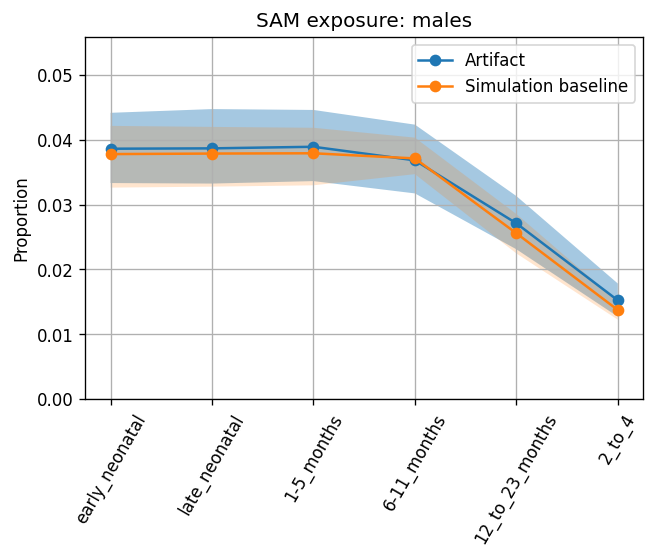

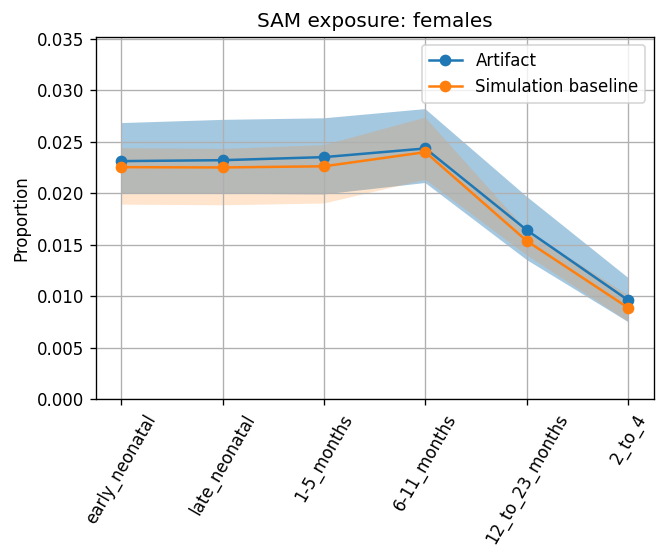

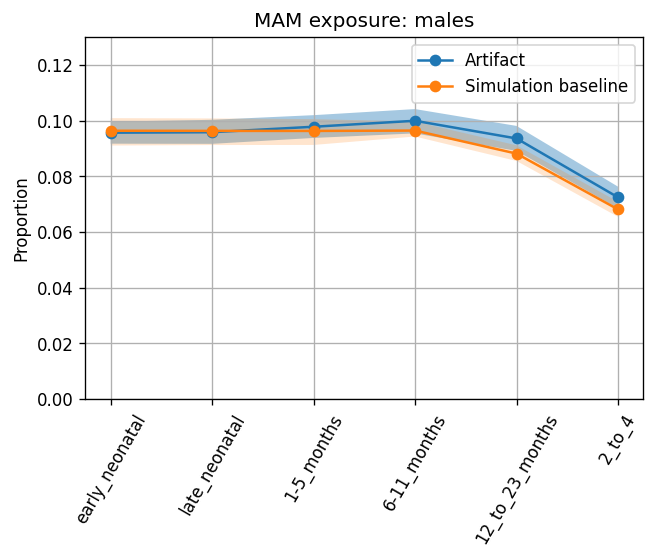

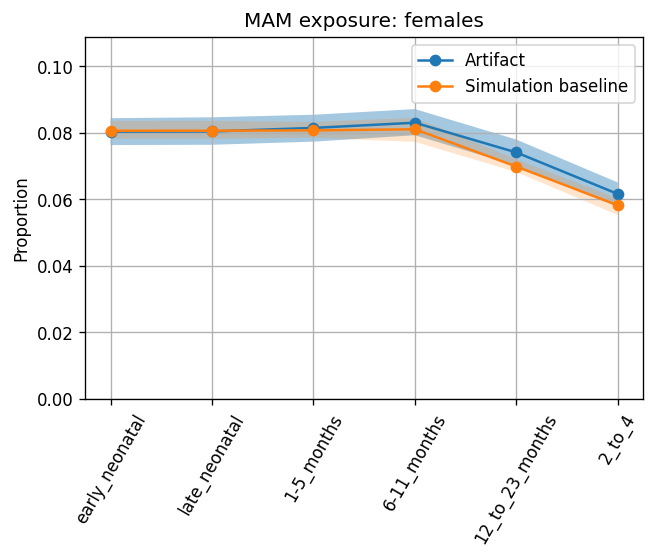

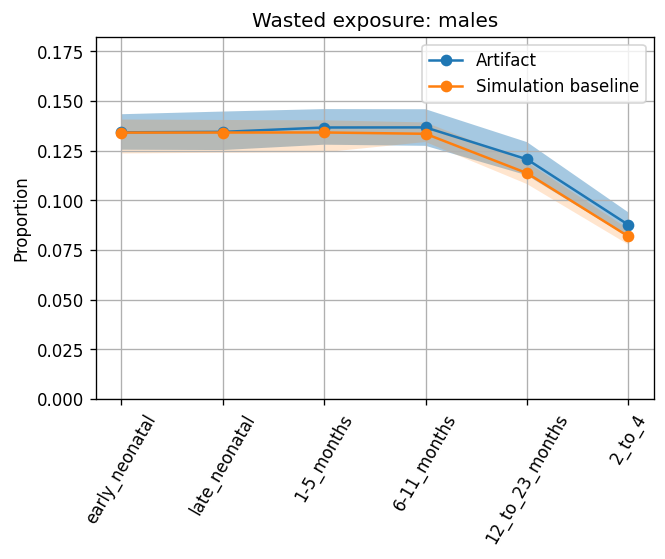

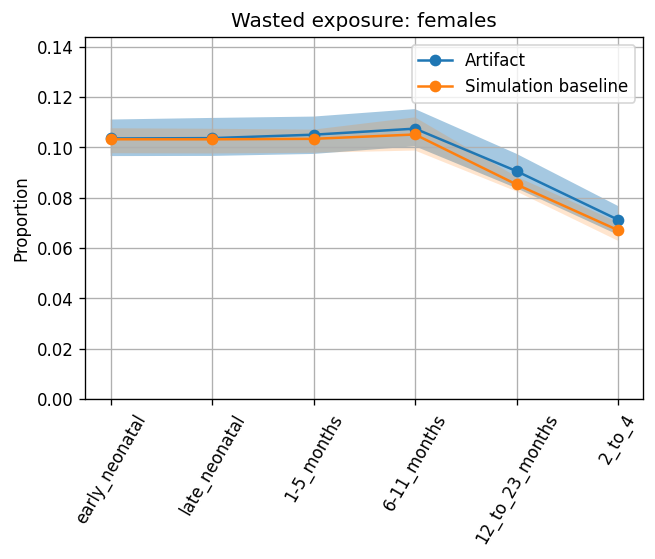

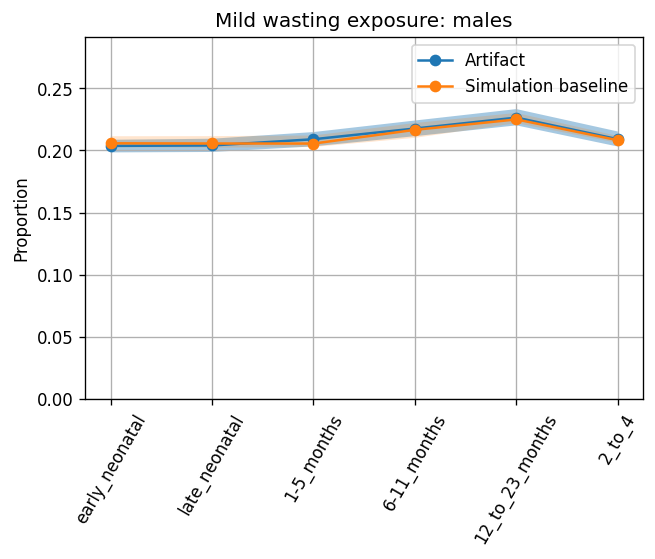

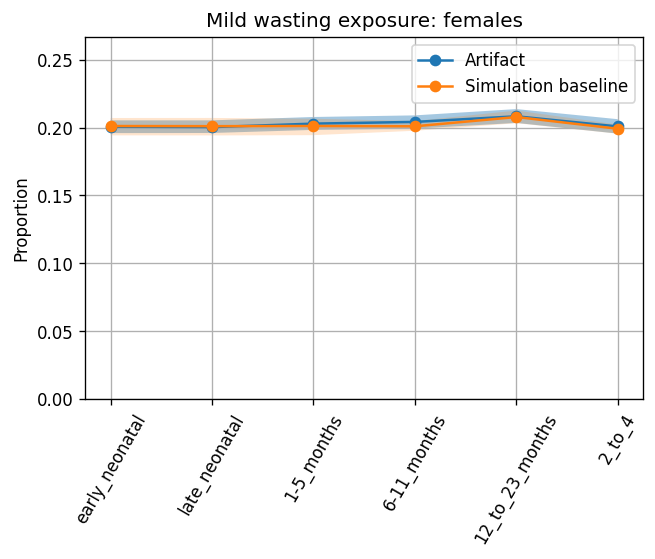

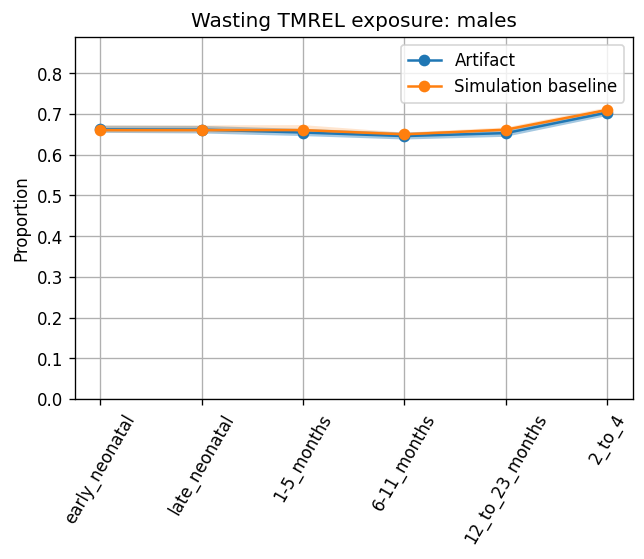

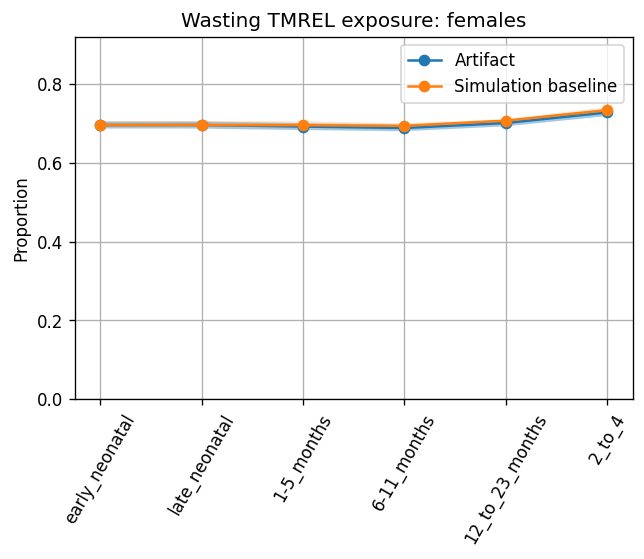

In [16]:
w_sim_cats = ['severe_acute_malnutrition','moderate_acute_malnutrition','wasted',
              'mild_child_wasting','susceptible_to_child_wasting']
s_sim_cats = ['cat1','cat2','stunted',
              'cat3','cat4']
art_cats = ['cat1','cat2','exposed','cat3','cat4']
w_title_cats = ['SAM','MAM','Wasted','Mild wasting','Wasting TMREL']
s_title_cats = ['Severe stunting','Moderate stunting','Stunted','Mild stunting','Stunting TMREL']

with PdfPages(f'plots/{figname}_exposure.pdf') as pdf:
    for i in list(range(0,len(art_cats))):
        for sex in ['male','female']:
            plot_cgf_exposure(wasting_prev, wasting_art, f'{sex}', art_cats[i],
                              w_sim_cats[i], w_title_cats[i])
            pdf.savefig(bbox_inches='tight')
    #for i in list(range(0,len(art_cats))):
    #    for sex in ['male','female']:
    #        plot_cgf_exposure(stunting_prev, stunting_art, f'{sex}', 
    #                          art_cats[i], s_sim_cats[i], s_title_cats[i])
    #        pdf.savefig(bbox_inches='tight')

# Cause parameters

In [17]:
def load_artifact_cause_data(measure, cause):
    data = art.load(f'cause.{cause}.{measure}')
    data = (data.apply(pd.DataFrame.describe, percentiles=[0.025, 0.975], axis=1)
            .filter(['mean', '2.5%', '97.5%']).reset_index())
    data['age'] = 0
    data['age'] = np.where(data['age_start'] == 0, 'early_neonatal', #1
                                            np.where(data['age_end'] == 0.5, '1-5_months', #3
                                                     np.where(data['age_start'] == 0.5, '6-11_months', #4
                                                              np.where(data['age_start'] == 1, '12_to_23_months',  #5
                                                                       np.where(data['age_start'] == 2, '2_to_4',       #6
                                                                       'late_neonatal'))))) #2
    data['age_group'] = np.where(data['age'] == 'early_neonatal', 1,
                                   np.where(data['age'] == 'late_neonatal', 2,
                                            np.where(data['age'] == '1-5_months', 3, 
                                                     np.where(data['age'] == '6-11_months', 4, 
                                                              np.where(data['age'] == '12_to_23_months', 5,
                                    6)))))
    data['sex'] = np.where(data['sex'] == 'Female', 'female', 'male')
    data['measure'] = measure
    data['cause'] = cause
    return data

In [18]:
artifact_data = pd.DataFrame()
causes=['all_causes','diarrheal_diseases','lower_respiratory_infections','protein_energy_malnutrition','measles']
measures=['prevalence','incidence_rate','remission_rate',
               'cause_specific_mortality_rate','excess_mortality_rate']
for cause in causes:    
    for measure in measures:
        try:
            temp = load_artifact_cause_data(measure, cause)
            artifact_data = pd.concat([artifact_data,temp], ignore_index=True)
        except:
            pass

artifact_data.head()

,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,age,age_group,measure,cause
0,female,0.000000,0.019178,2020,2021,0.869707,0.700294,1.093357,early_neonatal,1,cause_specific_mortality_rate,all_causes
1,female,0.019178,0.076712,2020,2021,0.098099,0.078973,0.123338,late_neonatal,2,cause_specific_mortality_rate,all_causes
2,female,0.076712,0.500000,2020,2021,0.012703,0.010194,0.015891,1-5_months,3,cause_specific_mortality_rate,all_causes
3,female,0.500000,1.000000,2020,2021,0.012703,0.010194,0.015891,6-11_months,4,cause_specific_mortality_rate,all_causes
4,female,1.000000,2.000000,2020,2021,0.003620,0.002928,0.004488,12_to_23_months,5,cause_specific_mortality_rate,all_causes


In [19]:
groupby_cols = ['input_draw','sex','age']

In [20]:
state_pt = pd.read_csv(output_dir + 'disease_state_person_time.csv')
transitions = pd.read_csv(output_dir + 'disease_transition_count.csv')
deaths = pd.read_csv(output_dir + 'deaths.csv')
deaths.head()

,Unnamed: 0,sex,year,cause,measure,input_draw,scenario,value,wasting_state,age
0,0,female,2022,diarrheal_diseases,death,29,baseline,0.0,susceptible_to_child_wasting,early_neonatal
1,1,female,2022,diarrheal_diseases,death,29,baseline,0.0,mild_child_wasting,early_neonatal
2,2,female,2022,diarrheal_diseases,death,29,baseline,0.0,moderate_acute_malnutrition,early_neonatal
3,3,female,2022,diarrheal_diseases,death,29,baseline,0.0,severe_acute_malnutrition,early_neonatal
4,4,female,2022,diarrheal_diseases,death,29,baseline,1.0,susceptible_to_child_wasting,late_neonatal


In [21]:
def calculate_csmr():
    d = deaths.loc[deaths.scenario=='baseline']
    pem = d.loc[d.cause.str.contains('acute_malnutrition')]
    pem['cause'] = 'protein_energy_malnutrition'
    acmr = d.copy()
    acmr['cause'] = 'all_causes'
    d = pd.concat([d.loc[d.cause.isin(['diarrheal_diseases','lower_respiratory_infections','measles'])],
                  pem, acmr], ignore_index=True)
    d = d.groupby(groupby_cols + ['cause']).sum()
    pt = (state_pt.loc[state_pt.cause.str.contains('measles')]
          .loc[state_pt.scenario=='baseline']
          .groupby(groupby_cols).sum())
    d = ((d / pt)[['value']])
         #.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause'])
         #.describe(percentiles=[0.025,0.975]))
    return d

In [22]:
def calculate_transition_rates():
    trans = transitions.loc[transitions.scenario=='baseline']
    trans['cause'] = trans['measure'].str.split('to_', expand=True)[2].str.split('_event_count', expand=True)[0]
    trans['measure'] = np.where(trans.measure.str.contains('to_susceptible_to'),'remission','incidence')
    trans = trans.groupby(groupby_cols+['cause','measure']).sum()
    pt = (state_pt.loc[state_pt.cause.str.contains('measles')]
          .loc[state_pt.scenario=='baseline']
          .groupby(groupby_cols).sum())
    trans = (trans / pt)[['value']]
    trans = trans#.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause','measure']).describe(percentiles=[0.025,0.975])
    return trans

In [23]:
def calculate_prevalence(causes):
    s = state_pt.copy()
    s = s.loc[s.scenario=='baseline']
    prev = pd.DataFrame()
    for cause in causes:
        infected = state_pt.loc[state_pt.cause==cause].groupby(groupby_cols + ['cause']).sum()
        total = state_pt.loc[state_pt.cause.str.contains(cause)].groupby(groupby_cols).sum()
        temp = (infected / total)[['value']]#.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause']).describe(percentiles=[0.025,0.975])
        prev = pd.concat([prev,temp])
    return prev

In [24]:
def calculate_child_growth_exposure_prevalence_by_draw(risk):
    state_pt = pd.read_csv(output_dir +f'{risk}_state_person_time.csv')
    state_pt = state_pt.loc[state_pt.scenario=='baseline']
    state_pt = state_pt.groupby(['input_draw','sex','age','cause']).sum()[['value']]
    prev = state_pt / state_pt.groupby(['input_draw','sex','age']).sum()
    #prev = prev.groupby(['sex','age','cause']).describe(percentiles=[0.025,0.975])
    return prev

In [25]:
csmr = calculate_csmr()
trans = calculate_transition_rates()
prev = calculate_prevalence(['diarrheal_diseases','measles','lower_respiratory_infections'])
pem_prev = calculate_child_growth_exposure_prevalence_by_draw('wasting').reset_index()
pem_prev = (pem_prev.loc[pem_prev.cause.str.contains('acute_malnutrition')]
            .groupby(['input_draw','sex','age']).sum().reset_index())
pem_prev['cause'] = 'protein_energy_malnutrition'
prev = pd.concat([prev.reset_index(), pem_prev], ignore_index=True).set_index(groupby_cols + ['cause'])
remission = trans / prev
emr = csmr / prev

prev=prev.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause']).describe(percentiles=[0.025,0.975])
trans=trans.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause','measure']).describe(percentiles=[0.025,0.975])
remission=remission.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause','measure']).describe(percentiles=[0.025,0.975])
emr=emr.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause']).describe(percentiles=[0.025,0.975])
csmr=csmr.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause']).describe(percentiles=[0.025,0.975])

<ipython-input-21-7be1e90e4d88>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pem['cause'] = 'protein_energy_malnutrition'
<ipython-input-22-1d4e092c465b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans['cause'] = trans['measure'].str.split('to_', expand=True)[2].str.split('_event_count', expand=True)[0]


In [26]:
trans

value            \
                                                            count      mean   
sex    age           cause                        measure                     
female 1-5_months    diarrheal_diseases           incidence  12.0  2.699927   
                                                  remission  12.0  2.723692   
                     lower_respiratory_infections incidence  12.0  0.093240   
                                                  remission  12.0  0.090712   
                     measles                      incidence  12.0  0.019856   
...                                                           ...       ...   
male   late_neonatal diarrheal_diseases           remission  12.0  3.109710   
                     lower_respiratory_infections incidence  12.0  0.092167   
                                                  remission  12.0  0.069006   
                     measles                      incidence  12.0  0.000000   
                                                  remission  12.0  0.000000   

                                                                       \
                                                                  std   
sex    age           cause                        measure               
female 1-5_months    diarrheal_diseases           incidence  0.338381   
                                                  remission  0.328044   
                     lower_respiratory_infections incidence  0.009464   
                                                  remission  0.009285   
                     measles                      incidence  0.010642   
...                                                               ...   
male   late_neonatal diarrheal_diseases           remission  0.245722   
                     lower_respiratory_infections incidence  0.015270   
                                                  remission  0.010333   
                     measles                      incidence  0.000000   
                                                  remission  0.000000   

                                                                       \
                                                                  min   
sex    age           cause                        measure               
female 1-5_months    diarrheal_diseases           incidence  2.137700   
                                                  remission  2.184806   
                     lower_respiratory_infections incidence  0.073215   
                                                  remission  0.071454   
                     measles                      incidence  0.007478   
...                                                               ...   
male   late_neonatal diarrheal_diseases           remission  2.648968   
                     lower_respiratory_infections incidence  0.070748   
                                                  remission  0.055590   
                     measles                      incidence  0.000000   
                                                  remission  0.000000   

                                                                       \
                                                                 2.5%   
sex    age           cause                        measure               
female 1-5_months    diarrheal_diseases           incidence  2.216128   
                                                  remission  2.261482   
                     lower_respiratory_infections incidence  0.075510   
                                                  remission  0.073983   
                     measles                      incidence  0.007669   
...                                                               ...   
male   late_neonatal diarrheal_diseases           remission  2.713327   
                     lower_respiratory_infections incidence  0.071548   
                                                  remission  0.055811   
                     measles   

In [27]:
trans.reset_index().loc[trans.reset_index().cause=='diarrheal_diseases']

sex              age               cause    measure value            \
                                                           count      mean   
0   female       1-5_months  diarrheal_diseases  incidence  12.0  2.699927   
1   female       1-5_months  diarrheal_diseases  remission  12.0  2.723692   
6   female  12_to_23_months  diarrheal_diseases  incidence  12.0  1.520298   
7   female  12_to_23_months  diarrheal_diseases  remission  12.0  1.536310   
12  female           2_to_4  diarrheal_diseases  incidence  12.0  1.516776   
13  female           2_to_4  diarrheal_diseases  remission  12.0  1.516032   
18  female      6-11_months  diarrheal_diseases  incidence  12.0  2.609871   
19  female      6-11_months  diarrheal_diseases  remission  12.0  2.613140   
24  female   early_neonatal  diarrheal_diseases  incidence  12.0  3.324547   
25  female   early_neonatal  diarrheal_diseases  remission  12.0  1.280540   
30  female    late_neonatal  diarrheal_diseases  incidence  12.0  3.374984   
31  female    late_neonatal  diarrheal_diseases  remission  12.0  3.132213   
36    male       1-5_months  diarrheal_diseases  incidence  12.0  2.690445   
37    male       1-5_months  diarrheal_diseases  remission  12.0  2.715711   
42    male  12_to_23_months  diarrheal_diseases  incidence  12.0  1.531307   
43    male  12_to_23_months  diarrheal_diseases  remission  12.0  1.545689   
48    male           2_to_4  diarrheal_diseases  incidence  12.0  1.546492   
49    male           2_to_4  diarrheal_diseases  remission  12.0  1.546115   
54    male      6-11_months  diarrheal_diseases  incidence  12.0  2.573054   
55    male      6-11_months  diarrheal_diseases  remission  12.0  2.574024   
60    male   early_neonatal  diarrheal_diseases  incidence  12.0  3.287621   
61    male   early_neonatal  diarrheal_diseases  remission  12.0  1.262752   
66    male    late_neonatal  diarrheal_diseases  incidence  12.0  3.353005   
67    male    late_neonatal  diarrheal_diseases  remission  12.0  3.109710   

                                                                
         std       min      2.5%       50%     97.5%       max  
0   0.338381  2.137700  2.216128  2.609891  3.204670  3.235240  
1   0.328044  2.184806  2.261482  2.625295  3.219712  3.245747  
6   0.111204  1.352814  1.366783  1.520218  1.715092  1.748708  
7   0.112316  1.363548  1.376982  1.536460  1.731888  1.762936  
12  0.112966  1.349311  1.366178  1.510203  1.713317  1.744755  
13  0.113020  1.347909  1.364841  1.510543  1.712705  1.743999  
18  0.335290  2.040408  2.107961  2.516587  3.083232  3.095368  
19  0.333088  2.051300  2.116295  2.517581  3.080016  3.088667  
24  0.290361  2.769572  2.835931  3.372019  3.754973  3.787500  
25  0.185378  1.071306  1.081078  1.216533  1.637511  1.686327  
30  0.237255  2.785544  2.905880  3.397762  3.672509  3.684993  
31  0.241363  2.573573  2.679986  3.151826  3.469088  3.492620  
36  0.353680  2.090709  2.176462  2.591325  3.218108  3.233664  
37  0.341363  2.149548  2.224893  2.606268  3.227616  3.237807  
42  0.122080  1.389278  1.393202  1.520504  1.735149  1.752887  
43  0.122474  1.403561  1.408559  1.535367  1.752000  1.770627  
48  0.122323  1.397598  1.401687  1.528755  1.736486  1.738341  
49  0.122423  1.397102  1.401447  1.527272  1.736456  1.738153  
54  0.328789  1.996128  2.082917  2.498354  3.066554  3.084743  
55  0.329867  2.001338  2.088022  2.497716  3.070069  3.088103  
60  0.228500  2.776026  2.840713  3.317162  3.532757  3.542126  
61  0.101774  1.063512  1.093719  1.262900  1.407836  1.418784  
66  0.250439  2.818375  2.899652  3.369078  3.668489  3.675703  
67  0.245722  2.648968  2.713327  3.148022  3.460930  3.464944

In [28]:
artifact_data.loc[(artifact_data.cause=='diarrheal_diseases')&(artifact_data.measure.isin(['incidence_rate','remission_rate']))]

,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,age,age_group,measure,cause
24,female,0.000000,0.019178,2020,2021,3.689702,3.233220,3.929672,early_neonatal,1,incidence_rate,diarrheal_diseases
25,female,0.019178,0.076712,2020,2021,3.633241,3.193225,3.878895,late_neonatal,2,incidence_rate,diarrheal_diseases
26,female,0.076712,0.500000,2020,2021,2.913438,2.367051,3.549568,1-5_months,3,incidence_rate,diarrheal_diseases
27,female,0.500000,1.000000,2020,2021,2.913438,2.367051,3.549568,6-11_months,4,incidence_rate,diarrheal_diseases
28,female,1.000000,2.000000,2020,2021,1.642656,1.252509,2.098485,12_to_23_months,5,incidence_rate,diarrheal_diseases
29,female,2.000000,5.000000,2020,2021,1.642656,1.252509,2.098485,2_to_4,6,incidence_rate,diarrheal_diseases
30,male,0.000000,0.019178,2020,2021,3.704897,3.295181,3.924238,early_neonatal,1,incidence_rate,diarrheal_diseases
31,male,0.019178,0.076712,2020,2021,3.646248,3.255340,3.874671,late_neonatal,2,incidence_rate,diarrheal_diseases
32,male,0.076712,0.500000,2020,2021,2.900479,2.352625,3.508276,1-5_months,3,incidence_rate,diarrheal_diseases
33,male,0.500000,1.000000,2020,2021,2.900479,2.352625,3.508276,6-11_months,4,incidence_rate,diarrheal_diseases


In [29]:
def plot_cause_data(measure, cause, sex):
    
    a = artifact_data.loc[artifact_data.sex==sex].loc[artifact_data.measure==measure].loc[artifact_data.cause==cause]
    assert len(a)>0
    plt.figure(dpi=120)
    plt.plot(a['age'], a['mean'], marker='o', label='Artifact data')
    plt.fill_between(a['age'], a['2.5%'], a['97.5%'], alpha=0.2)
    
    if measure=='cause_specific_mortality_rate':
        sim_data = csmr.copy()
    elif measure=='prevalence':
        sim_data=prev.copy()
    elif measure=='incidence_rate':
        sim_data=trans.reset_index().loc[trans.reset_index().measure=='incidence']
    elif measure=='remission_rate':
        sim_data=remission.reset_index().loc[remission.reset_index().measure=='remission']
    elif measure=='excess_mortality_rate':
        sim_data = emr.copy()
    s = sim_data.reset_index()
    s['order'] = np.where(s.age=='early_neonatal', 0,
                     np.where(s.age=='late_neonatal', 1,
                             np.where(s.age=='1-5_months',2,
                                     np.where(s.age=='6-11_months',3,
                                             np.where(s.age=='12_to_23_months',4,5)))))
    s = s.sort_values(by=['order'])
    s = s.loc[s.sex==f'{sex}'].loc[s.cause==cause]
    plt.plot(s['age'], s['value','mean'], marker='o', label=f'Simulation baseline')
    plt.fill_between(s['age'], s['value','2.5%'], s['value','97.5%'], alpha=0.2)
    if cause=='all_causes':
        plt.semilogy()
    plt.grid()
    plt.xticks(rotation=60)
    plt.legend()
    cause_title = cause.replace('_',' ').capitalize()
    measure_title = measure.replace('_',' ')
    plt.title(f'{cause_title} {measure_title}\n{sex.capitalize()}s')

<ipython-input-29-b4fe5ea21f05>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(dpi=120)


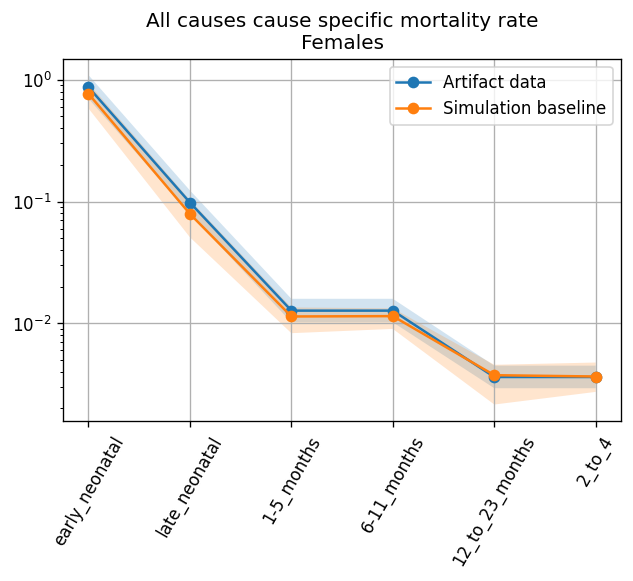

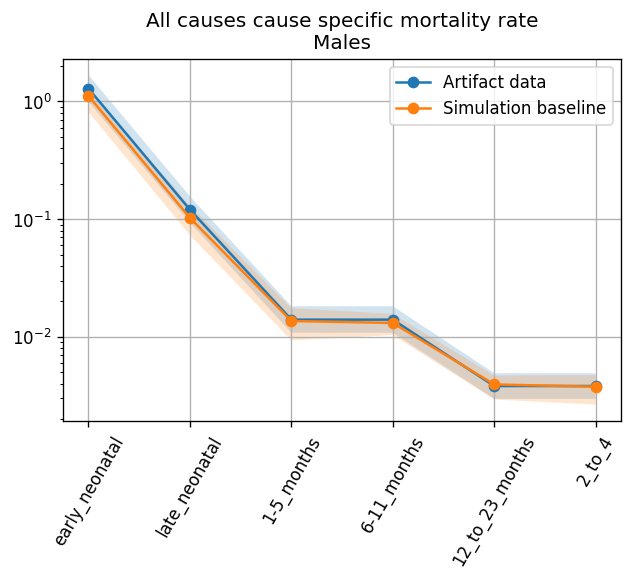

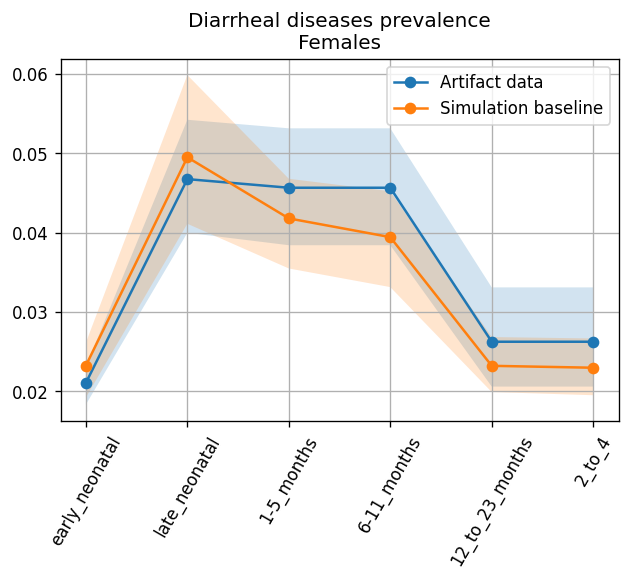

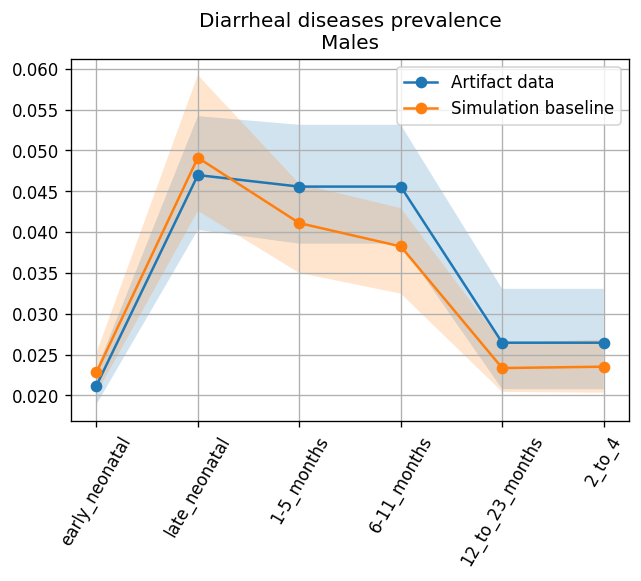

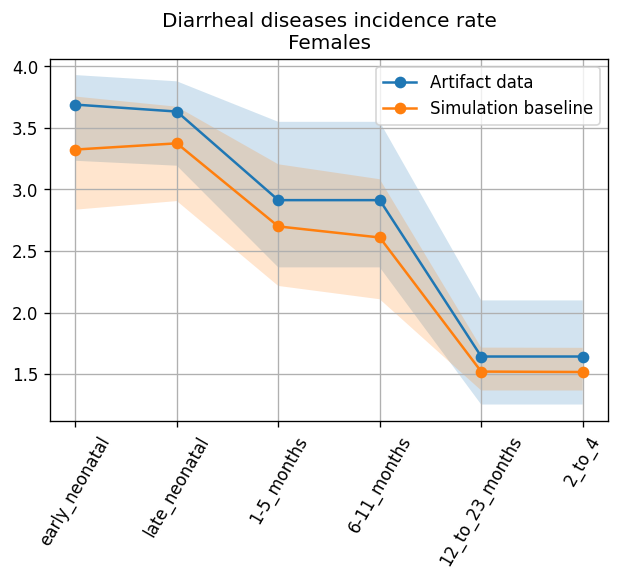

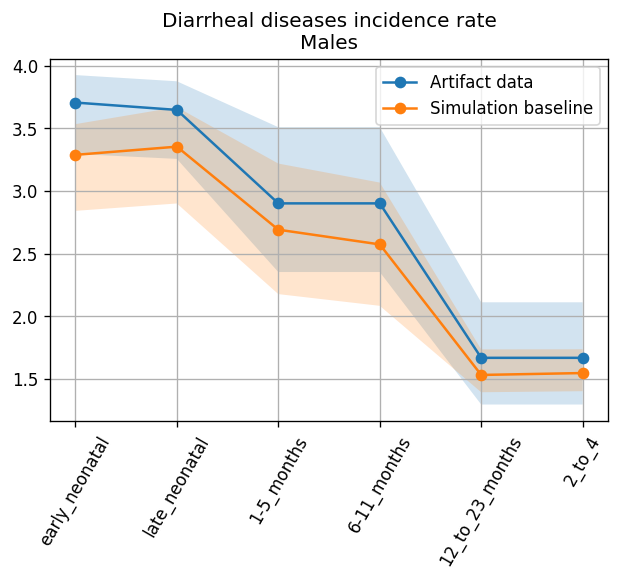

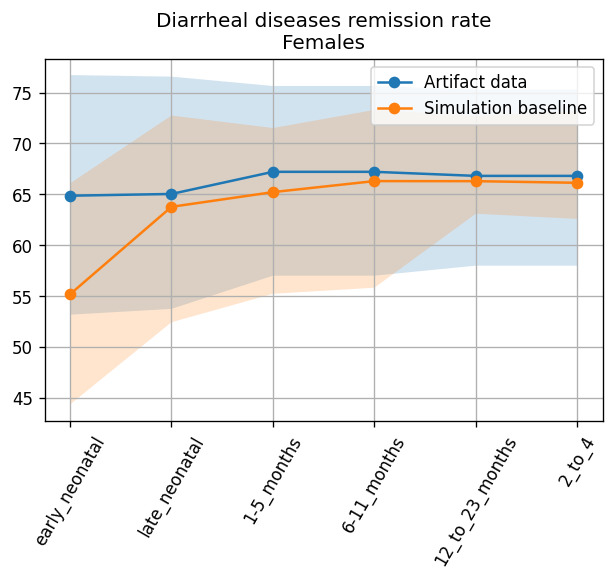

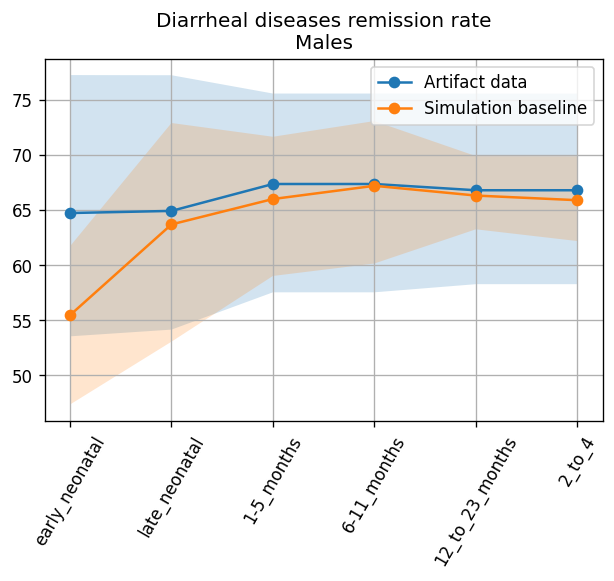

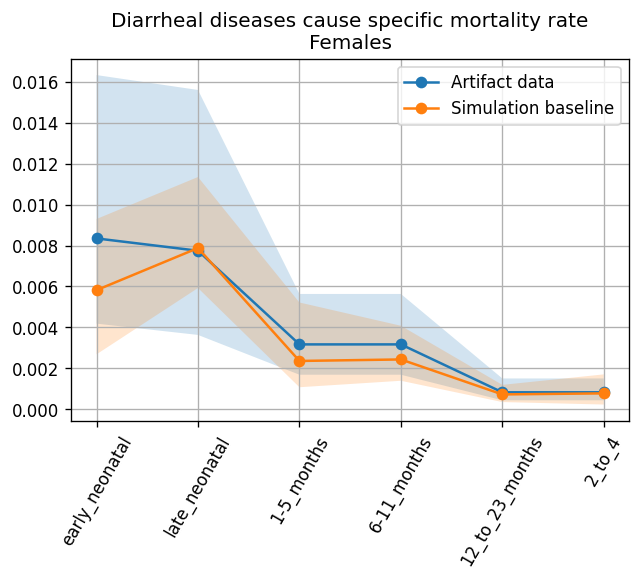

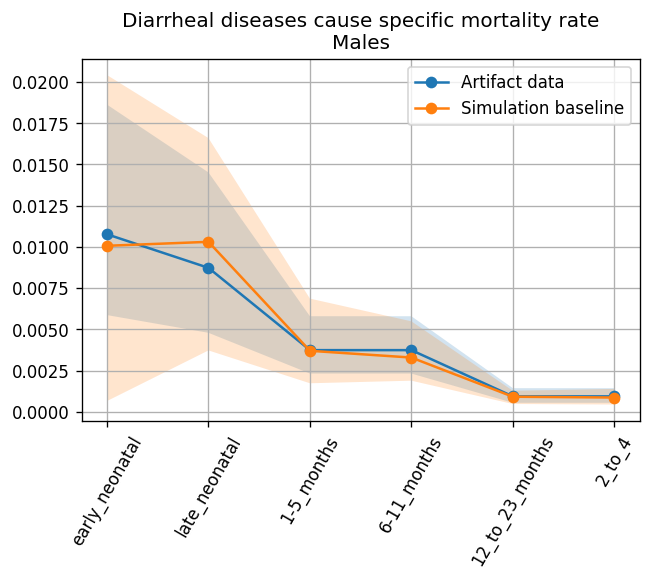

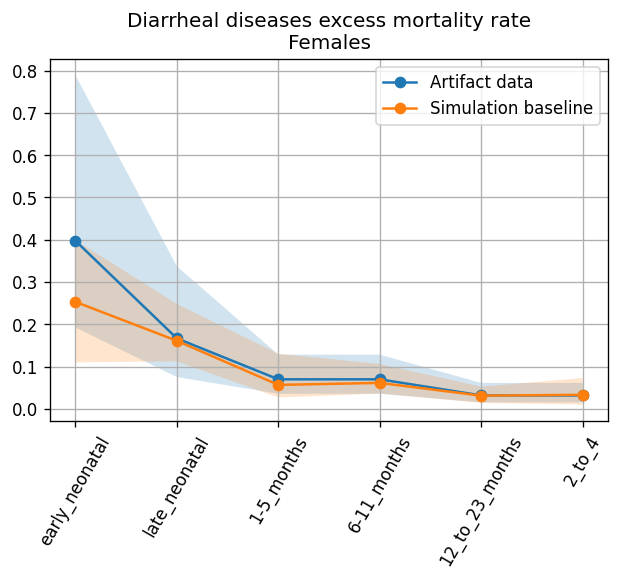

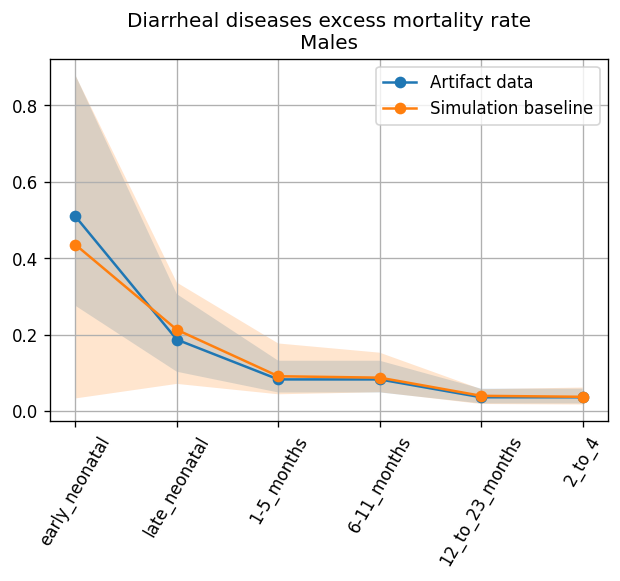

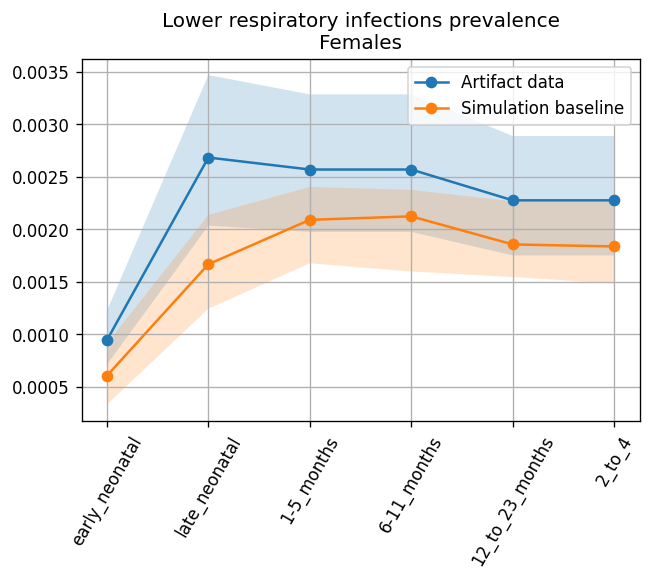

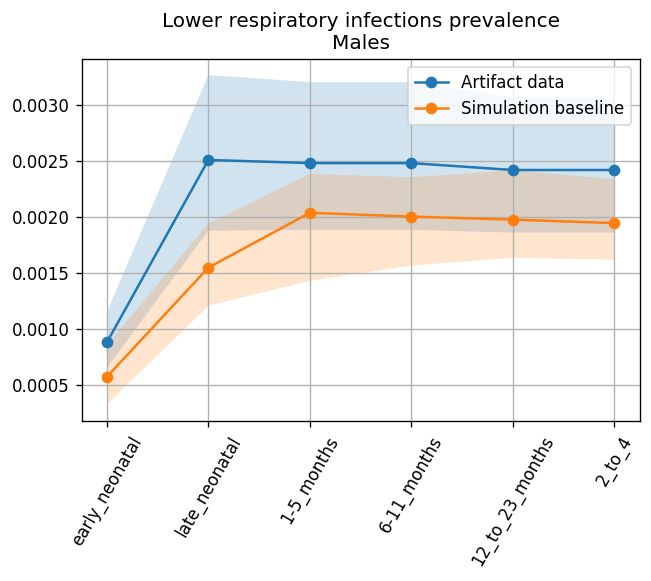

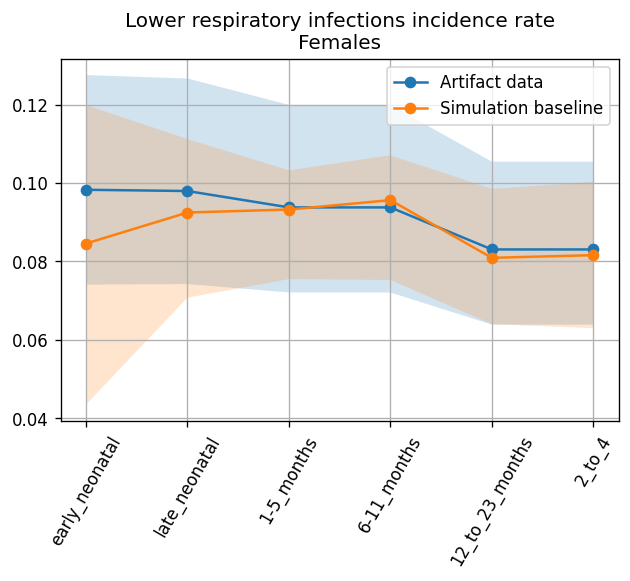

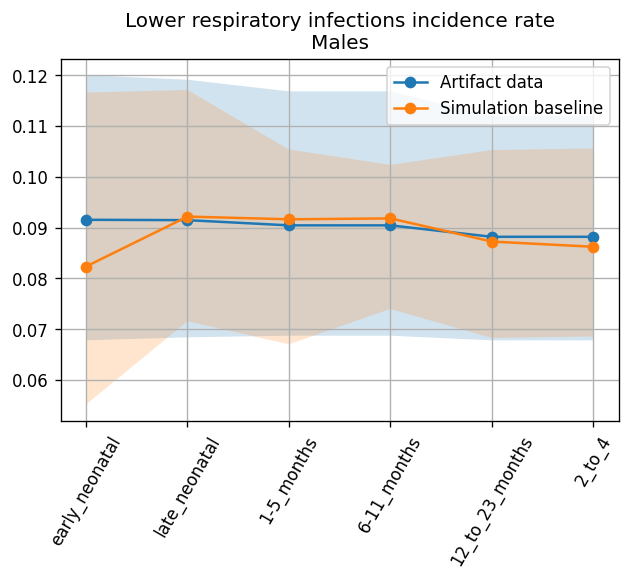

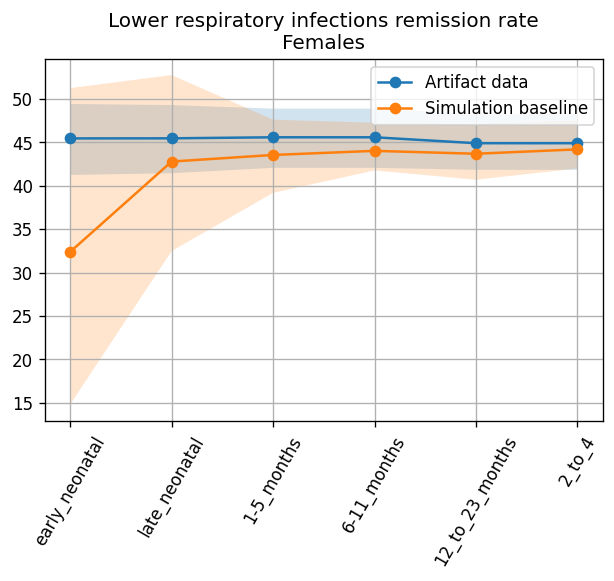

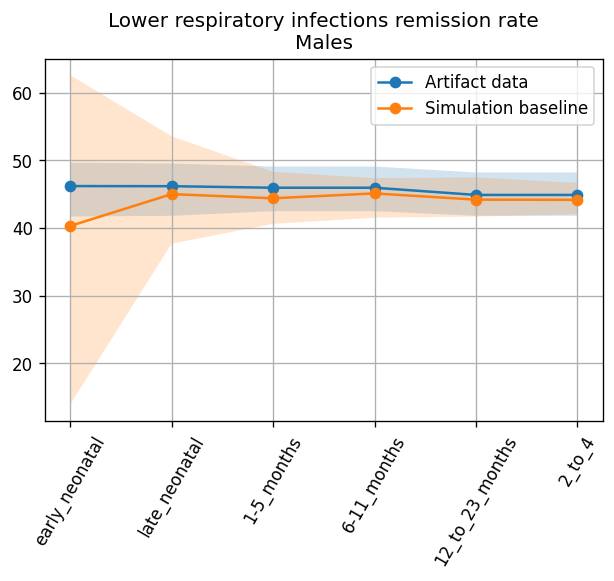

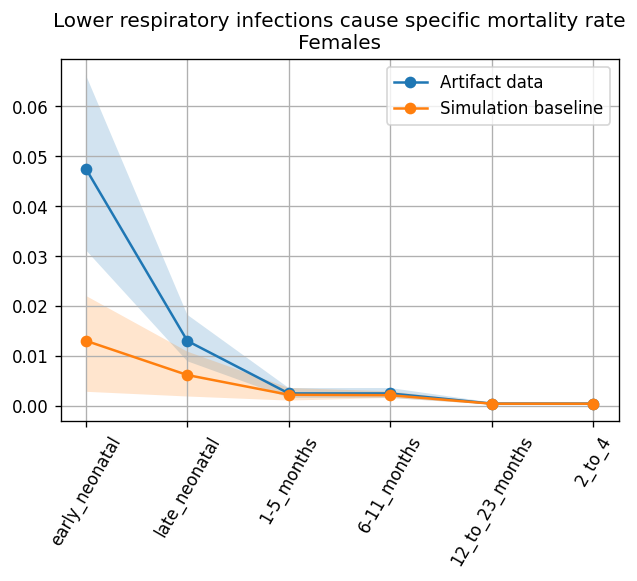

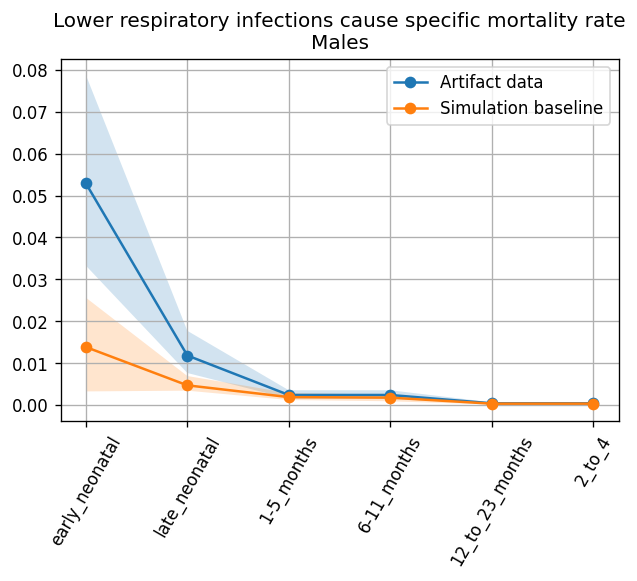

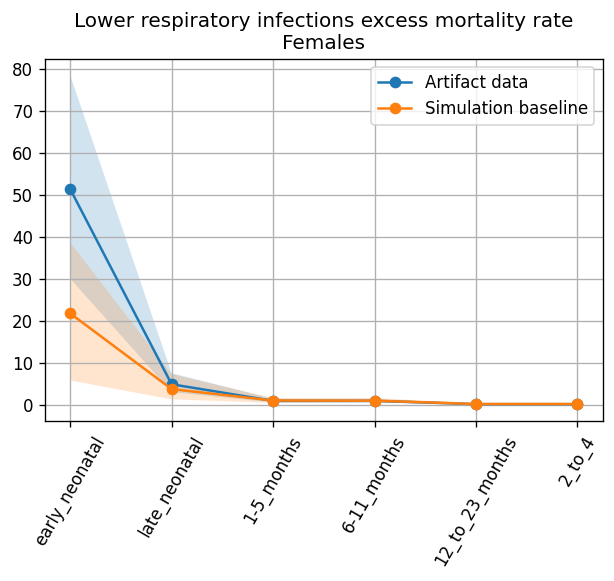

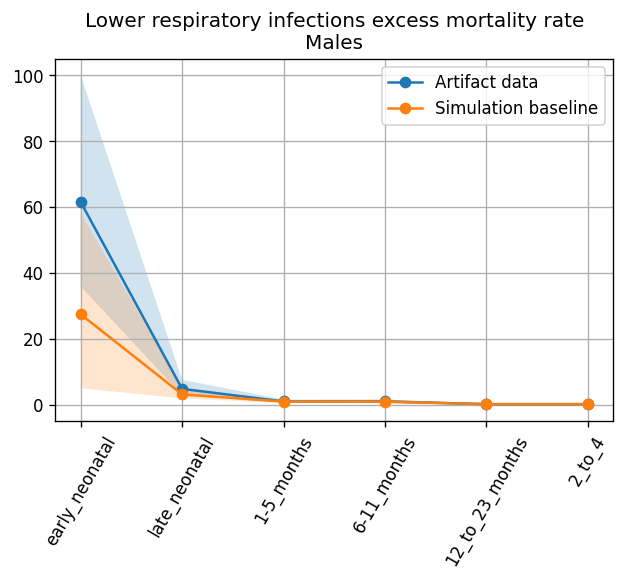

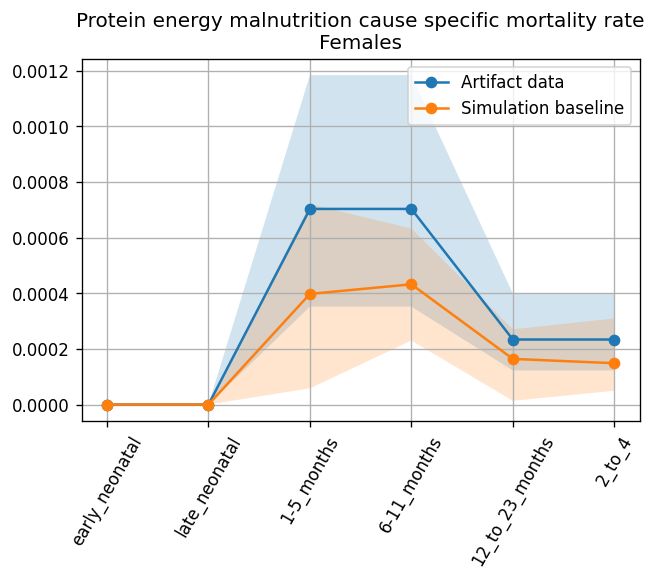

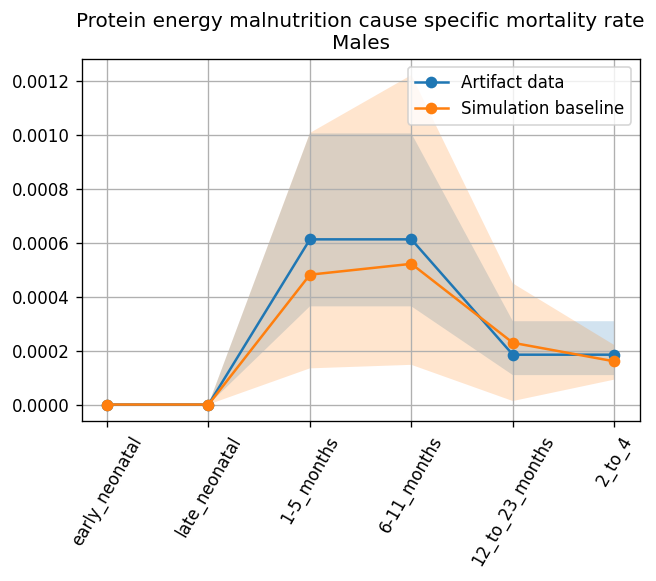

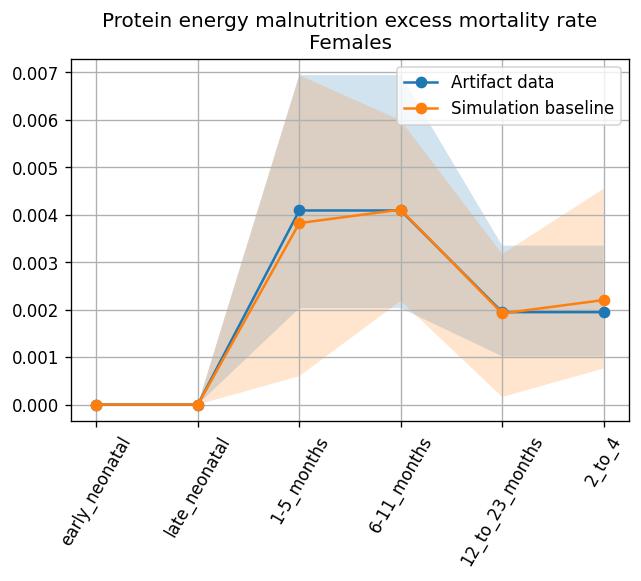

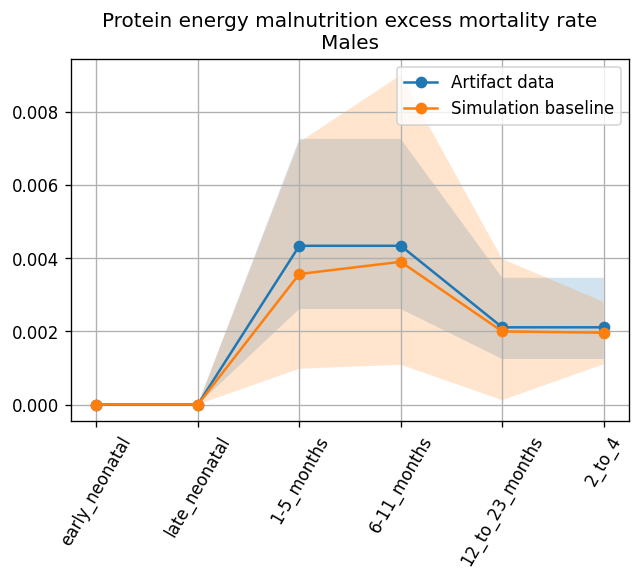

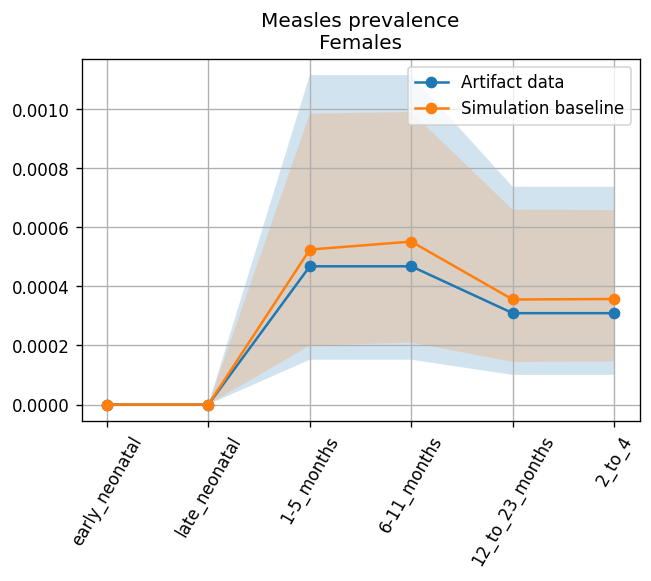

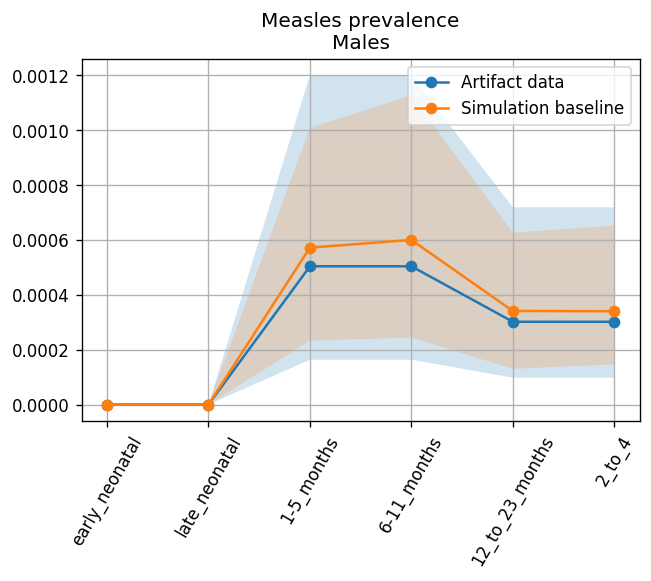

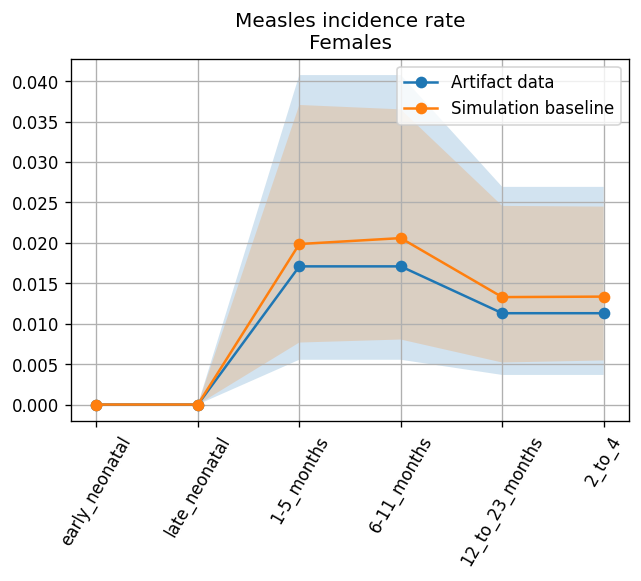

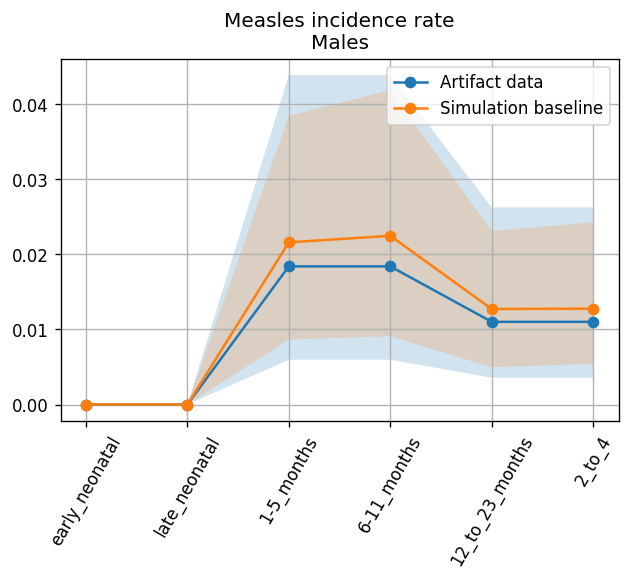

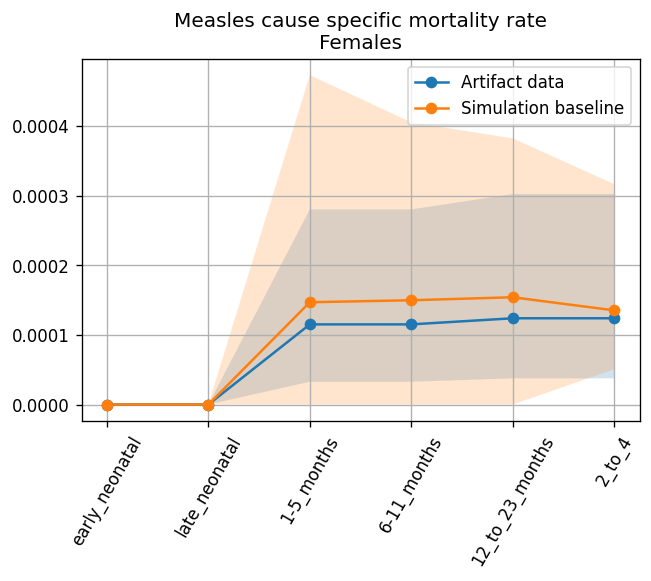

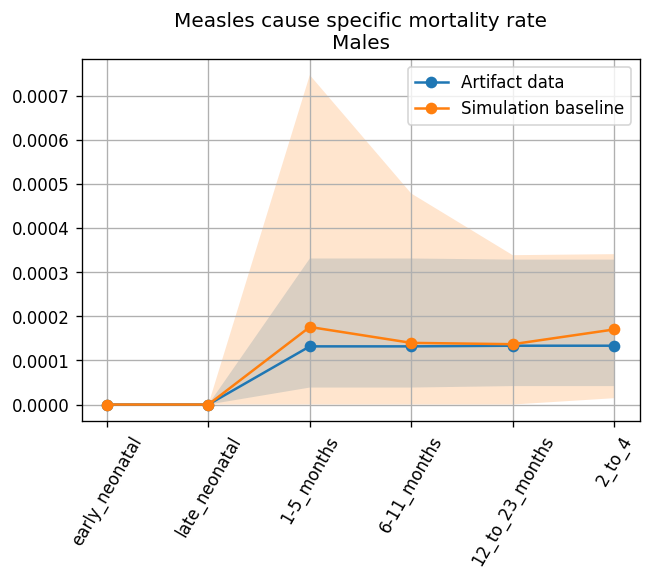

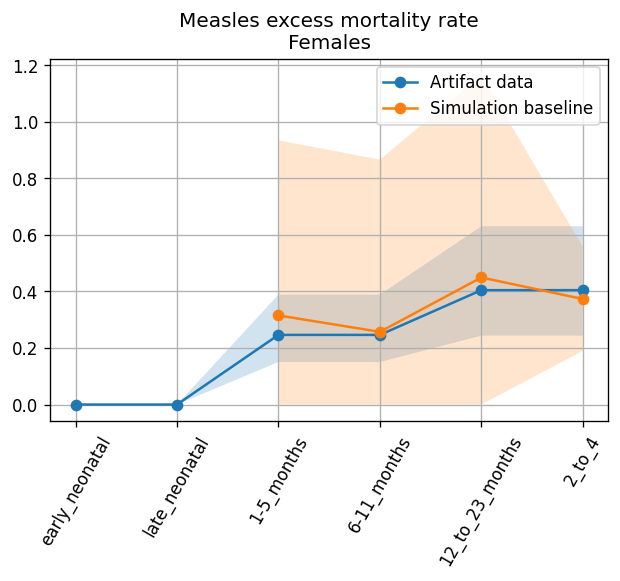

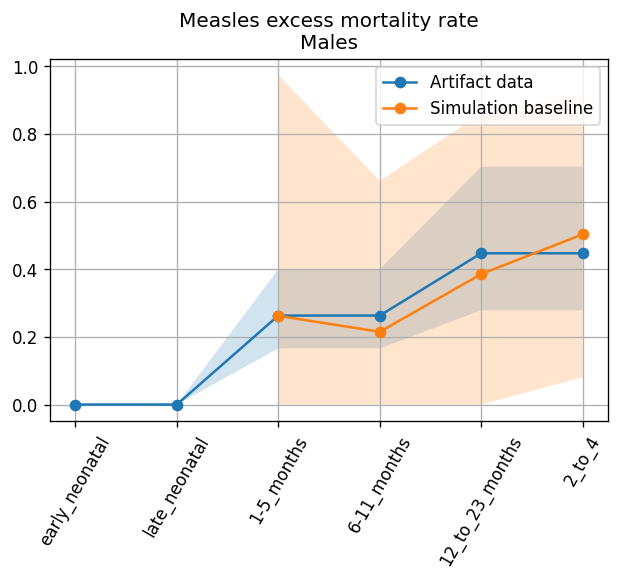

In [30]:
with PdfPages(f'plots/{figname}_cause_verification.pdf') as pdf:
    causes=['all_causes','diarrheal_diseases','lower_respiratory_infections','protein_energy_malnutrition','measles']
    measures=['prevalence','incidence_rate','remission_rate',
                   'cause_specific_mortality_rate','excess_mortality_rate']
    for cause in causes:
        for measure in measures:
            for sex in ['female','male']:
                try:
                    plot_cause_data(measure, cause, sex)
                    pdf.savefig(bbox_inches='tight')
                except:
                    pass